In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import zipfile

#really big dataset, it was the only way I could import it
zip_ref = zipfile.ZipFile('/content/drive/MyDrive/Data/asl_alphabet_train.zip', 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
import numpy as np
import os
import cv2
import skimage
from skimage.transform import resize

folders_path = '/tmp/asl_alphabet_train/'

X_train = np.empty((87000, 64, 64, 3), dtype=np.float32)
y_train = np.empty((87000,), dtype=np.int)
count = 0
#this is the structure of files in the unzipped dataset, thanks to segregation it was possible to import image and label at the same time
for folderName in os.listdir(folders_path):
  if folderName in ['A']:
      label = 0
  elif folderName in ['B']:
      label = 1
  elif folderName in ['C']:
      label = 2
  elif folderName in ['D']:
      label = 3
  elif folderName in ['E']:
      label = 4
  elif folderName in ['F']:
      label = 5
  elif folderName in ['G']:
      label = 6
  elif folderName in ['H']:
      label = 7
  elif folderName in ['I']:
      label = 8
  elif folderName in ['J']:
      label = 9
  elif folderName in ['K']:
      label = 10
  elif folderName in ['L']:
      label = 11
  elif folderName in ['M']:
      label = 12
  elif folderName in ['N']:
      label = 13
  elif folderName in ['O']:
      label = 14
  elif folderName in ['P']:
      label = 15
  elif folderName in ['Q']:
      label = 16
  elif folderName in ['R']:
      label = 17
  elif folderName in ['S']:
      label = 18
  elif folderName in ['T']:
      label = 19
  elif folderName in ['U']:
      label = 20
  elif folderName in ['V']:
      label = 21
  elif folderName in ['W']:
      label = 22
  elif folderName in ['X']:
      label = 23
  elif folderName in ['Y']:
      label = 24
  elif folderName in ['Z']:
      label = 25
  elif folderName in ['del']:
      label = 26
  elif folderName in ['nothing']:
      label = 27
  elif folderName in ['space']:
      label = 28
  else:
      label = 29
  for image_filename in os.listdir(folders_path + folderName):
    img_file = cv2.imread(folders_path + folderName + '/' + image_filename)
    if img_file is not None:
        img_file = skimage.transform.resize(img_file, (64, 64, 3))
        img_arr = np.asarray(img_file).reshape((-1, 64, 64, 3))

        X_train[count] = img_arr
        y_train[count] = label
        count += 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
X_train.shape

(87000, 64, 64, 3)

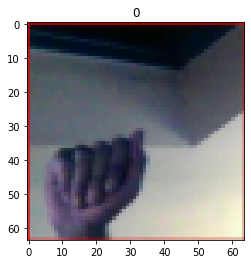

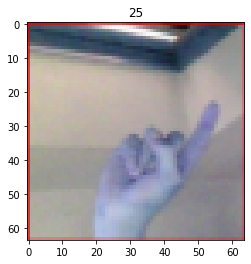

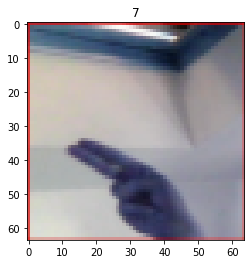

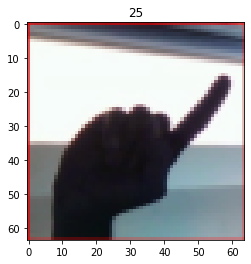

In [ ]:
import matplotlib.pyplot as plt

#some images
plt.imshow(X_train[50002])
plt.title(label=y_train[50002])
plt.show()
plt.imshow(X_train[50])
plt.title(label=y_train[50])
plt.show()
plt.imshow(X_train[45200])
plt.title(label=y_train[45200])
plt.show()
plt.imshow(X_train[23])
plt.title(label=y_train[23])
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.4,random_state=42)

In [ ]:
from tensorflow.keras.utils import to_categorical
y_cat_train = to_categorical(y_train,29)
y_cat_test = to_categorical(y_test,29)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_cat_train.shape)
print(y_cat_test.shape)

(52200, 64, 64, 3)
(52200,)
(34800, 64, 64, 3)
(34800,)
(52200, 29)
(34800, 29)


In [ ]:
from keras.layers.normalization.batch_normalization import BatchNormalization
from keras.backend import dropout
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten, Dropout, LeakyReLU

In [ ]:
# model1
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

In [ ]:
#Model2
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3))))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

In [ ]:
#Model3
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3), strides=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(BatchNormalization(renorm=True))
model.add(LeakyReLU(0.2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

In [ ]:
#Model4
model = Sequential()

model.add(Conv2D(64, (5, 5), input_shape=(64, 64, 3), strides=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2, 2)))
model.add(LeakyReLU(0.2))
model.add(Dropout(0.3))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(16, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))

model.add(Dense(29, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 20, 20, 64)        4864      
                                                                 
 activation (Activation)     (None, 20, 20, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 64)       0         
 )                                                               
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 10, 10, 64)        0         
                                                                 
 dropout (Dropout)           (None, 10, 10, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 32)          18464     
                                                        

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(X_train, y_cat_train, epochs=50, batch_size = 64, validation_data=(X_test, y_cat_test))

Epoch 1/50
816/816 [==============================] - 21s 11ms/step - loss: 2.8238 - accuracy: 0.1689 - val_loss: 1.7815 - val_accuracy: 0.4295
Epoch 2/50
816/816 [==============================] - 6s 8ms/step - loss: 1.3450 - accuracy: 0.5493 - val_loss: 0.9700 - val_accuracy: 0.6668
Epoch 3/50
816/816 [==============================] - 6s 8ms/step - loss: 0.9331 - accuracy: 0.6745 - val_loss: 0.7494 - val_accuracy: 0.7396
Epoch 4/50
816/816 [==============================] - 6s 8ms/step - loss: 0.7535 - accuracy: 0.7321 - val_loss: 0.5631 - val_accuracy: 0.8069
Epoch 5/50
816/816 [==============================] - 7s 9ms/step - loss: 0.6366 - accuracy: 0.7750 - val_loss: 0.5338 - val_accuracy: 0.8065
Epoch 6/50
816/816 [==============================] - 7s 9ms/step - loss: 0.5612 - accuracy: 0.8011 - val_loss: 0.4153 - val_accuracy: 0.8568
Epoch 7/50
816/816 [==============================] - 6s 8ms/step - loss: 0.4958 - accuracy: 0.8220 - val_loss: 0.3632 - val_accuracy: 0.8783
Epoc

In [ ]:
#To retrive RAM in colab it was must have to survive
import gc
del X_train
gc.collect()

1573

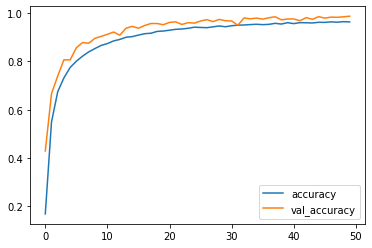

In [ ]:
import matplotlib.pyplot as plt

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

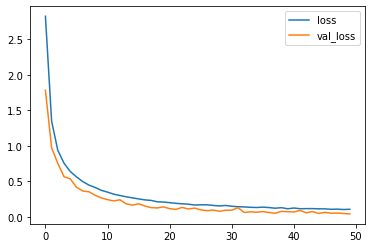

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

In [ ]:
loss, acc = model.evaluate(X_test, y_cat_test)
print("Accuracy", acc)

1088/1088 [==============================] - 4s 3ms/step - loss: 0.0394 - accuracy: 0.9872
Accuracy 0.9871551990509033


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
probs = model.predict(X_test)
y_pred = np.argmax(probs,axis=1)

In [ ]:
print(probs.shape)

(34800, 29)


In [ ]:
print(y_cat_test.shape)
print(y_pred.shape)

(34800, 29)
(34800,)


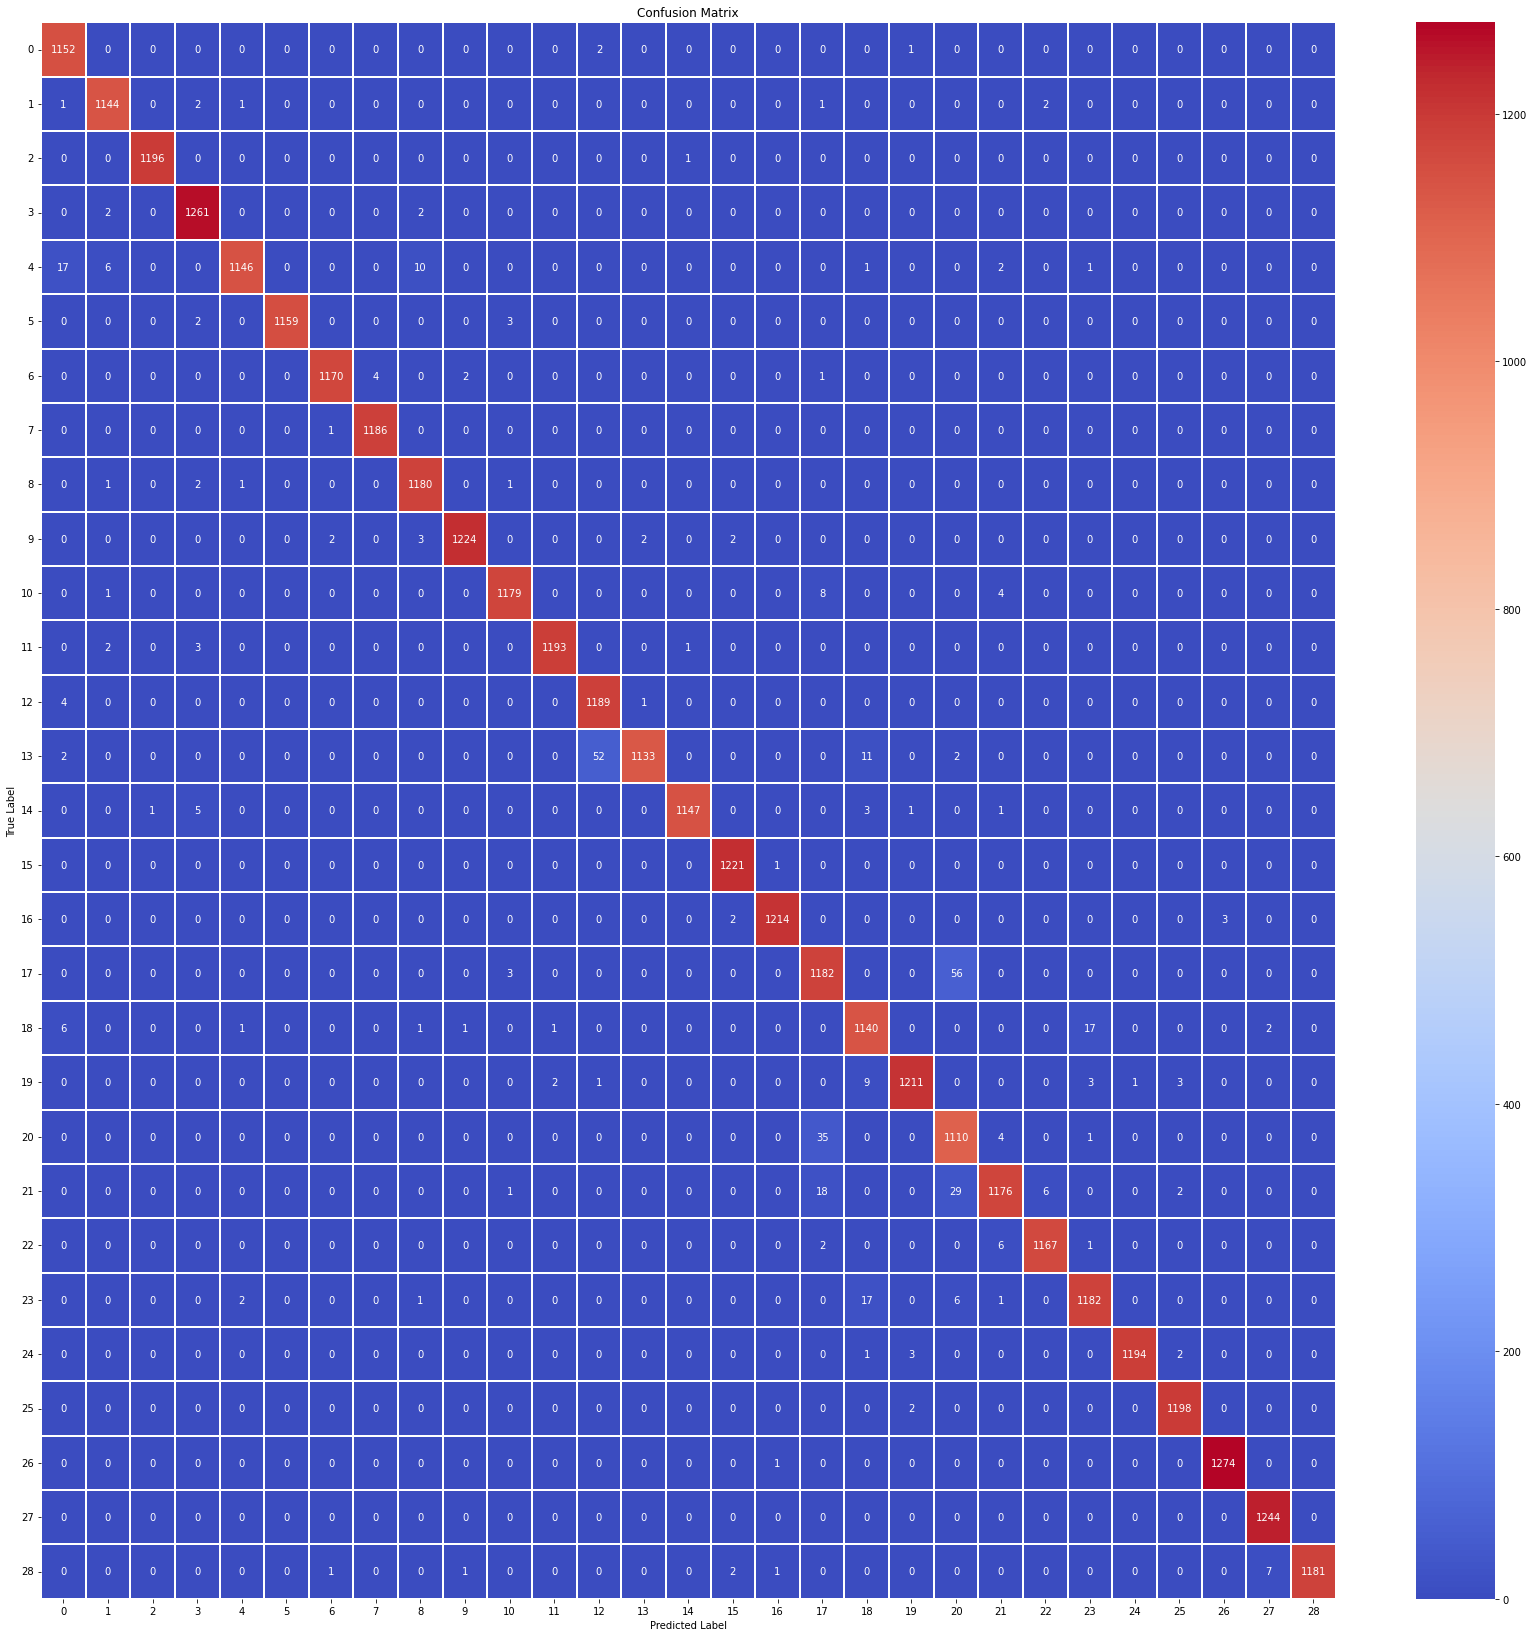

In [ ]:
import seaborn as sns
from sklearn import metrics

LABELS = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16','17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29']

def show_confusion_matrix(validations, predictions, num_classes):
    matrix = metrics.confusion_matrix(validations, predictions)
    plt.figure(figsize=(num_classes, num_classes))
    hm = sns.heatmap(matrix,
                cmap='coolwarm',
                linecolor='white',
                linewidths=1,
                xticklabels=LABELS[0:num_classes],
                yticklabels=LABELS[0:num_classes],
                annot=True,
                fmt='d')
    plt.yticks(rotation = 0)  # Don't rotate (vertically) the y-axis labels
    # hm.set_ylim(0, len(matrix))
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

show_confusion_matrix(y_test, y_pred, 29)